In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
Run1IntRef = np.loadtxt('OCXOIntRefPhasemeter_20190605_162130_ASD.txt')
Run2IntRef = np.loadtxt('OCXOIntRefPhasemeter_20190605_164030_ASD.txt')
Run3ExtRef = np.loadtxt('OCXOExtRefPhasemeter_20190606_170747_ASD.txt')
Run4ExtRef = np.loadtxt('OCXOExtRefPhasemeter_20190606_173221_ASD.txt')

In [3]:
ASDDict = {}
ASDDict['Moku Run1 Internal 10MHz Clk'] = Run1IntRef
ASDDict['Moku Run2 Internal 10MHz Clk'] = Run2IntRef
ASDDict['Moku Run3 External 10MHz Rb Clk'] = Run3ExtRef
ASDDict['Moku Run4 External 10MHz Rb Clk'] = Run4ExtRef

In [4]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,data in ASDDict.items():
    plt.loglog(data[:,0],data[:,1],label=key,c=cList[ii])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('Measured frequency noise from Moku when input was\nWenzel Crystal Oscillator @24.4835 MHz')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

In [5]:
MarconiData1 = np.loadtxt('../20190117_Marconi_PLL_Noise/Marconi539_500Hz_0_17-01-2019_165744.txt')
MarconiData2 = np.loadtxt('../20190117_Marconi_PLL_Noise/Marconi539_500Hz_1_17-01-2019_165904.txt')
MarconiData = np.concatenate((MarconiData1,MarconiData2[100:,:]))
MarconiData[:,1] = MarconiData[:,1]*500 #Multiplying by actuation slope to convert into frequency noise ASD
ASDDict['Marconi External 10MHz Rb Clk'] = MarconiData

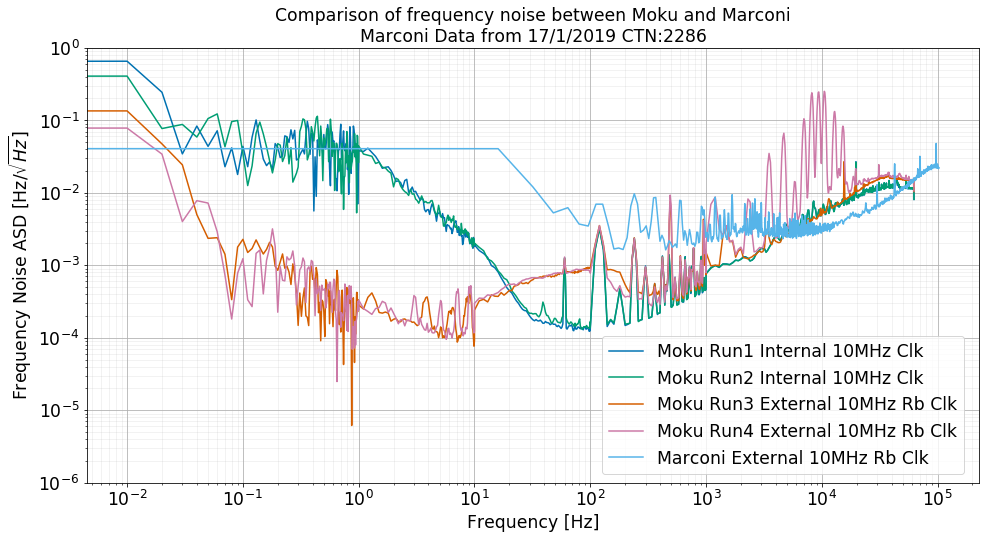

In [6]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,data in ASDDict.items():
    plt.loglog(data[:,0],data[:,1],label=key,c=cList[ii])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('Comparison of frequency noise between Moku and Marconi\nMarconi Data from 17/1/2019 CTN:2286')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
fig.gca().set_ylim((1e-6,1))
figlist += [fig]

In [7]:
pp = PdfPages('MokuFrequencyNoiseAnalysis.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()